## ⭐ stack

##### 📲 Stack 계산기
1. 문자열로 된 계산식
- stack을 이용하여 값을 계산할 수 있음
- 문자열 수식 계산의 일반적인 방법

❗후위표기법으로 변환할 때는 연산자를 stack에 넣음  
❗후위표기법 식은 피연산자를 stack에 넣음


##### 📲 중위 표기법의 후위 표기법 변환방법1

1. 수식의 각 연산자에 대해서 우선순위에 따라 괄호를 사용하여 다시 표현
2. 각 연산자를 그에 대응하는 오른쪽 괄호의 뒤로 이동
3. 괄호 제거

예를 들어, A*B-C/D 라는 중위 표기법에서 후위 표기법으로 변환하는 방법은 다음과 같다.  
- 1단계 : ((A*B) - (C/D))
- 2단계 : ((AB) * (CD)/)-
- 3단계 : AB * CD/-

##### 📲 중위 표기법의 후위 표기법 변환방법2
1. 입력 받은 중위 표기법에서 토큰을 읽음
2. 토큰이 피연산자면 토큰을 출력
3. 토큰이 연산자(괄호포함)일 때,
- 이 토큰이 스택의 top에 저장되어 있는 연산자보다 우선순위가 높으면 스택에 push하고,
- 그렇지 않다면, 스택 top의 연산자의 우선순위가 토큰의 우선순위보다 작을 때까지 스택에서 pop 한 후 토큰의 연산자를 push 함
- 만약 top에 연산자가 없으면 push함
4. 토큰이 오른쪽 괄호 ')' 이면 스택 top에 왼쪽 괄호 '(' 가 올 때까지 pop 연산을 수행하고 pop한 연산자를 출력함 (왼쪽 괄호를 만나면 pop만 하고 출력하지 않음)
5. 중위 표기법에 더 읽을 것이 없다면 중지하고, 더 읽을 것이 있다면 1부터 다시 반복
6. 스택에 남아 있는 연산자를 모두 pop하여 출력
- 스택 밖의 왼쪽 괄호는 우선 순위가 가장 높으며, 스택 안의 왼쪽 괄호는 우선 순위가 가장 낮음

##### 후위 표기법 변환
변환할 중위 표기법으로 표현된 수식
```
(6+5*(2-8)/2)
```

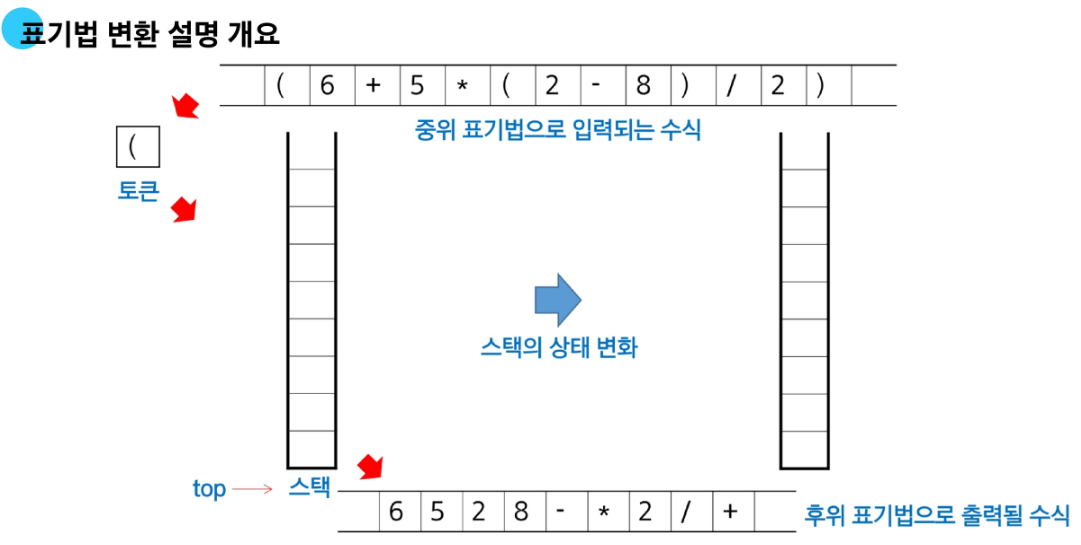

##### 표기법 변환 설명 개요
![image.png](./img/stack15.png)  
  
![image.png](./img/stack16.png)  
  
  

In [8]:
# 계산기 만들기

stack = [0] * 10
top = -1

# 밖에 있을 때 우선 순위(클수록 높음)
icp = {'(':3, '/':2, '*':2, '+':1, '-':1}
# 스택 안에서의 우선순위(클수록 높음)
isp = {'(':0, '/':2, '*':2, '+':1, '-':1}

infix = '6+5*(2-8)/2'
postfix = ''

for token in infix:
    # 피연산자라면 후위식에 추가
    if token not in '(+-*/)':
        postfix += token
    elif token == ')': # 닫는 괄호를 만날 때까지 pop
        while top > -1 and stack[top] != '(':
            postfix += str(stack[top]) # 정수를 문자열로 변환하여 추가
            top -= 1
        if top > -1 and stack[top] == '(':
            top -= 1
    else:
        if top == -1 or isp[stack[top]] < icp[token]:
            top += 1
            stack[top] = token
        elif isp[stack[top]] >= icp[token]:
            while top > -1 and isp[stack[top]] >= icp[token]:
                postfix += str(stack[top]) # 정수를 문자열로 변환하여 추가
                top -= 1
            top += 1
            stack[top] = token

# 스택에 남은 모든 연산자를 후위식에 추가
while top > -1:
    postfix += str(stack[top]) # 정수를 문자열로 변환하여 추가
    top -= 1
    
print(postfix)

6528-*2/+


##### 후위 표기법 식을 Stack을 이용하여 계산
1. 피연산자를 만나면 스택에 push 함
2. 연산자를 만나면 필요한 만큼의 피연산자를 스택에서 pop하여 연산하고, 연산 결과를 다시 스택에 push함
3. 수식이 끝나면, 마지막으로 스택을 pop하여 출력함

![image.png](./img/stack16.png)  

![image.png](./img/stack17.png)  

![image.png](./img/stack18.png)  

![image.png](./img/stack19.png)


## ⭐ Stack 응용

##### 🛤️ 백트래킹 이란?
후보해를 구성해 나가다가, 더 이상 해가 될 수 없다고 판단되면 되돌아가서(backtrack) 다른 경로를 시도하는 방법  

1. 문제 해결을 위한 탐색 알고리즘의 하나
2. 가능성이 없는 경로는 더 이상 탐색하지 않고 되돌아가며 해결책을 찾는 방식
3. 최적화 문제와 결정 문제에 적용

**[적용 예]**  
- N-Queens 문제
- 미로찾기
- 순열/조합 생성
- 부분집합 탐색
- 스도쿠 풀이


##### ✔️ Backtracking과 DFS와의 차이
1. Prunning(가지치기) 유무
- Backtracking은 어떤 node에서 출발하는 경로가 해결책으로 이어질 것 같지 않으면 더 이상 그 경로를 따라가지 않고 시도를 줄임
2. 조기 경로 차단
- DFS는 모든 경로를 추적하지만, Backtracking은 불필요한 경로를 조기에 차단
3. 경우의 수가 많은 경우
- 예를 들어 N! 인 경우의 수를 가진 문제에 대해 DFS를 가하면 처리가 불가능함
- Backtracking을 적용하면 일반적으로 경우의 수가 줄어들지만, 최악의 경우 지수함수 시간을 요하므로 처리가 불가능함

**❗모든 후보를 검사 하지는 않음**

##### Backtracking 기법
1. 어떤 노드의 유망성을 점검한 후에 유망(promising)하지 않다고 결정되면 그 노드의 부모로 되돌아가 다음 자식 노드로 이동
2. 어떤 노드를 방문하였을 때 그 노드를 포함한 경로가 해답이 될 수 없으면 그 노드는 유망하지 않다고 하며, 반대로 해답의 가능성이 있으면 유망하다고 함
3. 가지치기(pruning) : 유망하지 않는 노드가 포함되는 경로는 더 이상 고려하지 않음

![image.png](./img/stack20.png)  

## ⭐ 오프라인 강사님 보충 수업

In [23]:
# 재귀 호출은 기본적으로 반복이다.

# for 문은 종료 조건이 있기 때문에 반복하다 멈춤
for i in range(3):
    print('hello!')

print('------------------------------------------')

# for 문과 다르게 종료 조건이 없기 때문에 계속 반복함
# 반복의 선을 넘으면 종료시킴 --> recursion error
def print_hello():
    print('hello!')
    print_hello()

# print_hello()

# 조건문을 넣어서 재귀함수 구성하기
def print_hello2(i):
    if i == 3:
        return
    else:
        print('hello!')
        print_hello2(i + 1)

print_hello2(0)

print('------------------------------------------')

def print_hello3(i, n):
    if i == n:
        return
    else :
        print('hello!', i)
        print_hello3(i+1, n)

print_hello3(0,3)

print('------------------------------------------')
# 마치 스택에 값을 쌓아놨다가 나오는 것처럼 보임
def print_hello4(i, n):
    if i == n:
        return
    else:
        print('hello!', i)
        print_hello4(i+1, n)
        print('hello!', i)

print_hello4(0,3)

print('------------------------------------------')
# 이진 트리
def print_hello5(i, n):
    if i == n:
        global cnt
        cnt += 1
        return
    else:
        print_hello5(i+1, n)
        print_hello5(i+1, n)

cnt = 0
print_hello5(0,3)
print(cnt)


hello!
hello!
hello!
------------------------------------------
hello!
hello!
hello!
------------------------------------------
hello! 0
hello! 1
hello! 2
------------------------------------------
hello! 0
hello! 1
hello! 2
hello! 2
hello! 1
hello! 0
------------------------------------------
8


In [ ]:
T = int(input())
V, E = map(int, input().split())

G = [[] for _ in range(V + 1)]

arr = [1, 3, 1, 2, 2, 4, 3, 7, 4, 6, 5, 6, 6, 7, 2, 5]

for i in range(E):
   u, v = arr[i], arr[i+1]
   G[u].append(v)
   G[v].append(u)

start, end = map(int, input().split())
visited = [0] * (V+1)

def DFS(v):
    visited[v] = 1
    for w in G[v]:
        if not visited[w]:
            DFS(w)

DFS(start)
print(visited[end])

In [ ]:
# 백트래킹을 하려면 먼저 무얼 생각해야 할까?
# 체계적으로 완전 탐색을 하려고 한다.
# 그래프 혹은 트리를 탐색하면서 최적해를 찾는다.
# 상태 공간 트리(그래프) -> 가상의 트리


## ✍️ 연습문제

##### Forth

1. Forth라는 컴퓨터 언어는 스택 연산을 기반으로 하고 있어 후위 표기법을 사용한다. 예를 들어 3+4는 다음과 같이 표기한다.
```
3 4 + .
```
2. Forth에서는 동작은 다음과 같다.
3. 숫자는 스택에 넣는다.
4. 연산자를 만나면 스택의 숫자 두 개를 꺼내 더하고 결과를 다시 스택에 넣는다.
5. ‘.’은 스택에서 숫자를 꺼내 출력한다.
6. Forth 코드의 연산 결과를 출력하는 프로그램을 만드시오. 만약 형식이 잘못되어 연산이 불가능한 경우 ‘error’를 출력한다.
7. 다음은 Forth 연산의 예이다.
 
![image.png](./img/forth.png)    
 
[입력]  
1. 첫 줄에 테스트 케이스 개수 T가 주어진다.  1≤T≤50
2. 다음 줄부터 테스트 케이스의 별로 정수와 연산자가 256자 이내의 연산코드가 주어진다. 피연산자와 연산자는 여백으로 구분되어 있으며, 코드는 ‘.’로 끝난다.
3. 나눗셈의 경우 항상 나누어 떨어진다.

[출력]  
 1. '#'과 1번부터인 테스트케이스 번호, 빈칸에 이어 계산결과를 정수로 출력하거나 또는 ‘error’를 출력한다.

In [ ]:
T = int(input())

for time in range(1, T+1):
    arr = list(input().split())
    N = len(arr)
    stack = [0] * 256
    top = -1
    print_txt = ''
    for token in arr:
        if token == '.':
            print_txt = stack[0]
            break
        elif token not in '(+-*/)':
            top += 1
            stack[top] = int(token)
        else:
            if top > 0:
                a = stack[top]
                top -= 1
                b = stack[top]
                top -= 1
                if token == '+':
                    top += 1
                    stack[top] = b+a
                elif token == '-':
                    top += 1
                    stack[top] = b-a
                elif token == '*':
                    top += 1
                    stack[top] = b*a
                elif token == '/':
                    top += 1
                    stack[top] = int(b/a)
            else:
                print_txt = 'error'
                break

    if top == 0:
        print(f'#{time} {print_txt}')
    else:
        print(f'#{time} error')

15


##### 🗓️ 계산기

1. 문자열로 이루어진 계산식이 주어질 때, 이 계산식을 후위 표기식으로 바꾸어 계산하는 프로그램을 작성하시오.
```
예를 들어
“3+4+5+6+7”
라는 문자열로 된 계산식을 후위 표기식으로 바꾸면 다음과 같다.
"34+5+6+7+"
변환된 식을 계산하면 25를 얻을 수 있다.
```
2. 문자열 계산식을 구성하는 연산자는 + 하나뿐이며 피연산자인 숫자는 0 ~ 9의 정수만 주어진다.

[입력]  
1. 각 테스트 케이스의 첫 번째 줄에는 문자열 계산식의 길이가 주어진다. 그 다음 줄에 문자열 계산식이 주어진다.
2. 총 10개의 테스트 케이스가 주어진다.

[출력]  
1. '#'부호와 함께 테스트 케이스의 번호를 출력하고, 공백 문자 후 답을 출력한다.

In [ ]:
import sys
sys.stdin = open('input.txt')

for time in range(1, 11):
    N = int(input())
    arr = list(input())
    postfix = []

    stack = [''] * N
    top = -1

    for token in arr:
        if token in '+':
            top += 1
            stack[top] = token
        else:
            postfix += str(token)

    item = 0
    for i in postfix:
        item += int(i)

    print(f'#{time} {item}')